## ** Data Visualization and Analysis of Safir Academy **




## Where is Safir?
Safir is a language academy for which I used to work as a data analyst and consultant.
In this notebook I will try to present some samples of the work I have done there.


## What will we see in this notebook?

In this notebook, I have tried to firstly, demonstrate how each level is contributing to the total number 
of students in each term and secondly, how well the institute is doing on retaining the active students and
preventing students' loss.

## What tools will be used?

Like most data analysis related documents, in this one I have used the following libraries for data preparation
and manipulation:

    *pandas
    *numpy
And have also used the following libraries for data visualization:
    
    *matplotlib
    *seaborn

## Things to consider:

*This institue is in fact a very big organization with different departments such as education, book publication, translation, ... . In this notebook however, I mostly rely on female-adult students statistics as they have allowed me to publish only this portion of the data.

*The data presented in this notebook is for the year 1398(Iranian Calender) which is 2019 or so.
In Iranian calender the new year starts in March (the beginning of the spring).

*Each year in Safir Educational Calender, contains 8 terms. This would obviously mean that the first term starts in March and ends some time in early May. 

*The language proficiency levels in this academy is indicated by numbers. There are 4 books and each book is taught in 6 terms. Thus the numbers are: 101, 102, 103, 104, 105, 106, 201,...,406.
101 being the first terms of the first book and 406 being the final term of the last book.

*Other details will be written as comments in the related cells.

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
os.chdir("/home/azadeh/dev-temp/data/term")

In [4]:
Terms = pd.read_csv("AllTerms.csv")

In [5]:
Terms.set_index('Unnamed: 0', inplace=True)

In [6]:
Terms.head()


#In this dataframe, we can see in each term how many students were registered in each level.
#For instance, in the second term of the year, in level 204(the fourth level of the second book) there were 
#12 students which is shown in the next cell.


,101,102,103,104,105,106,201,202,203,204,...,303,304,305,306,401,402,403,404,405,406
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
term1,4,14,10,9,33,16,9,13,1,12,...,26,8,11,18,5,11,7,5,3,4
term2,22,24,30,17,11,20,16,19,17,12,...,15,11,16,11,3,11,4,5,2,5
term3,7,20,21,25,18,17,19,1,16,19,...,7,26,14,12,14,11,11,4,5,5
term4,22,18,1,19,24,24,13,20,20,1,...,6,13,25,11,9,13,11,11,4,8
term5,11,30,18,21,22,21,18,20,18,1,...,11,13,27,10,11,7,4,11,3,7


In [7]:
Terms.iloc[1]["204"]

12

In [8]:
Terms.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, term1 to all
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   101     9 non-null      int64
 1   102     9 non-null      int64
 2   103     9 non-null      int64
 3   104     9 non-null      int64
 4   105     9 non-null      int64
 5   106     9 non-null      int64
 6   201     9 non-null      int64
 7   202     9 non-null      int64
 8   203     9 non-null      int64
 9   204     9 non-null      int64
 10  205     9 non-null      int64
 11  206     9 non-null      int64
 12  301     9 non-null      int64
 13  302     9 non-null      int64
 14  303     9 non-null      int64
 15  304     9 non-null      int64
 16  305     9 non-null      int64
 17  306     9 non-null      int64
 18  401     9 non-null      int64
 19  402     9 non-null      int64
 20  403     9 non-null      int64
 21  404     9 non-null      int64
 22  405     9 non-null      int64
 23  406     9 non-null

## We are going to see a dashboard presenting how each level`s students volume changed through a year. 

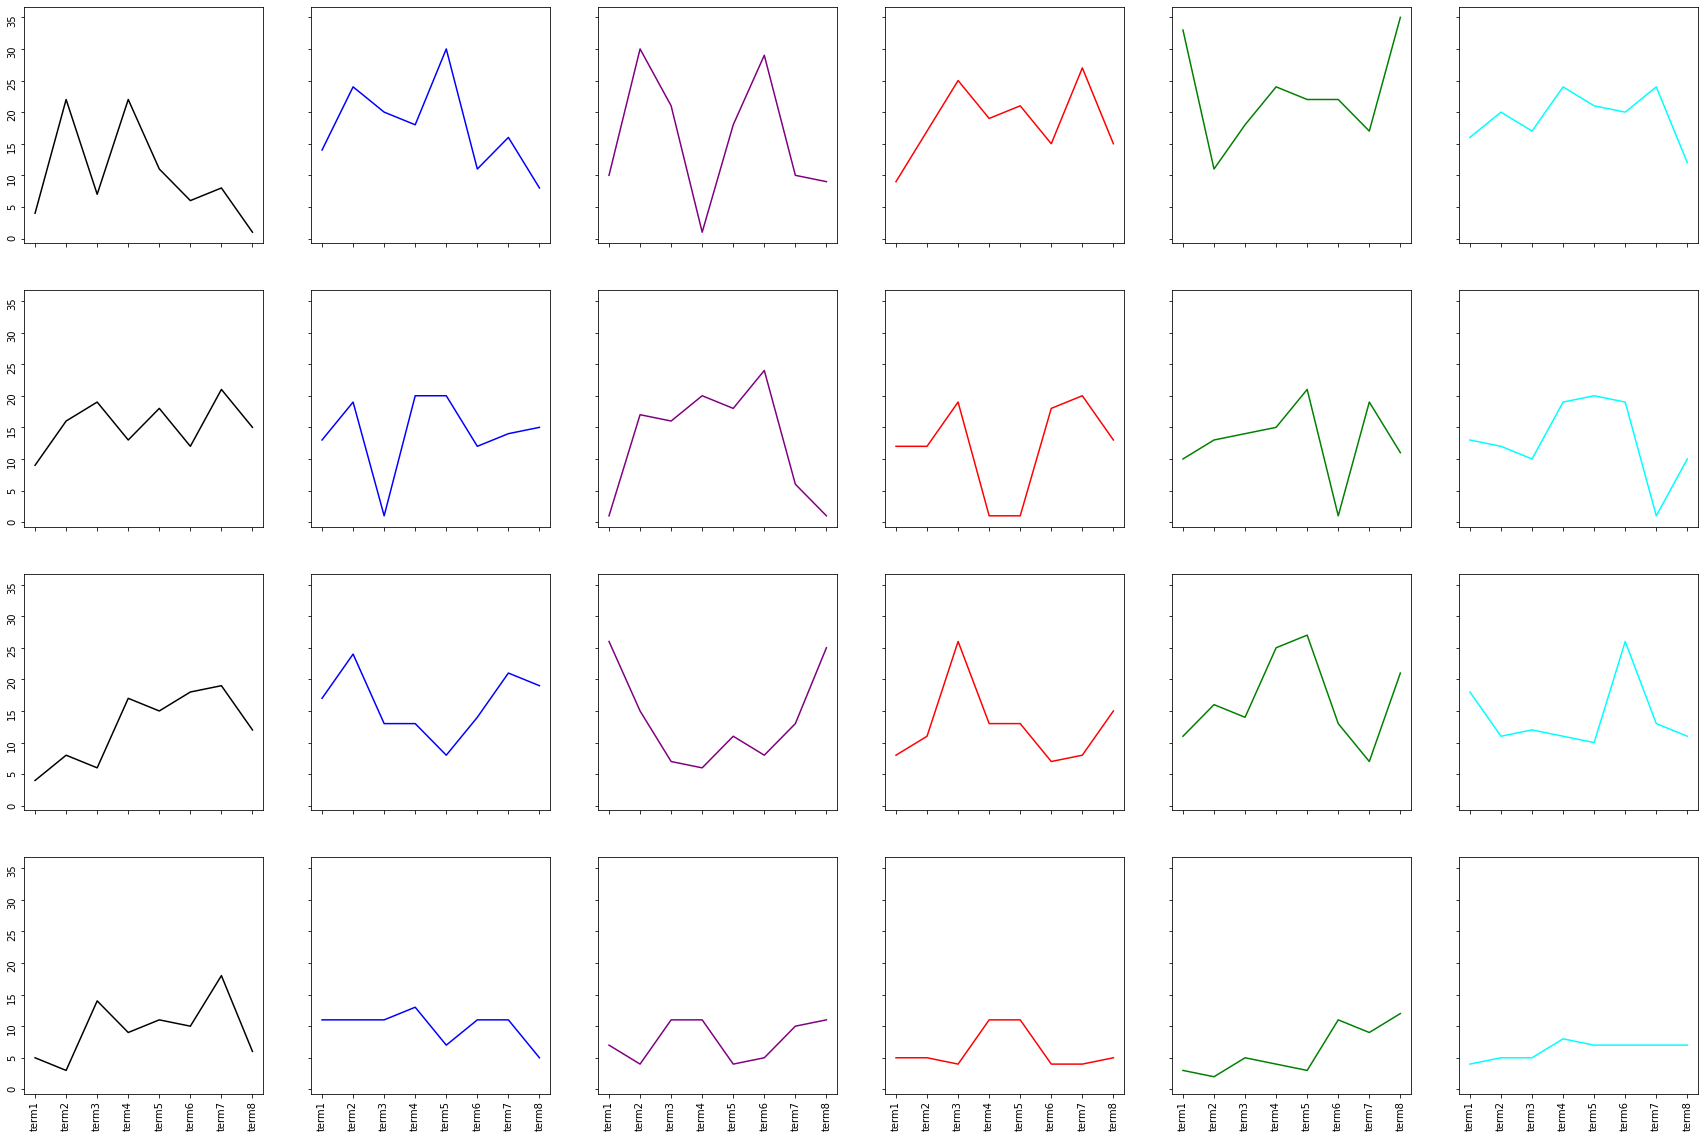

In [10]:
TermsOnly = Terms.drop("all")
fig, ax = plt.subplots( nrows=4, ncols=6, figsize=(30,20), sharex=True, sharey=True)

i=0
j=0

Tags = []
for tag in Terms.columns:
    Tags.append(tag)
Tags=np.array(Tags).reshape(4,6)

Cdict = {"101":"black", "102": "blue", "103":"purple", "104":"red", "105":"green", "106":"cyan",
        "201":"black", "202": "blue", "203":"purple", "204":"red", "205":"green", "206":"cyan",
        "301":"black", "302": "blue", "303":"purple", "304":"red", "305":"green", "306":"cyan",
        "401":"black", "402": "blue", "403":"purple", "404":"red", "405":"green", "406":"cyan"}

for i in range(4):
    for j in range(6):
        ax[i,j].plot(TermsOnly[Tags[i,j]], c=Cdict[Tags[i,j]])
        index+=1




for i in range(4):
    for j in range(6):
        ax[i,j].tick_params(labelrotation=90);

## Analysis
as we can see, most leveles went through dramatic changes during a year. However, students of the final book
seem to have been more consistent. Especially, the final level 406, which is justifiable since students 
receive a certification when they finish 406.

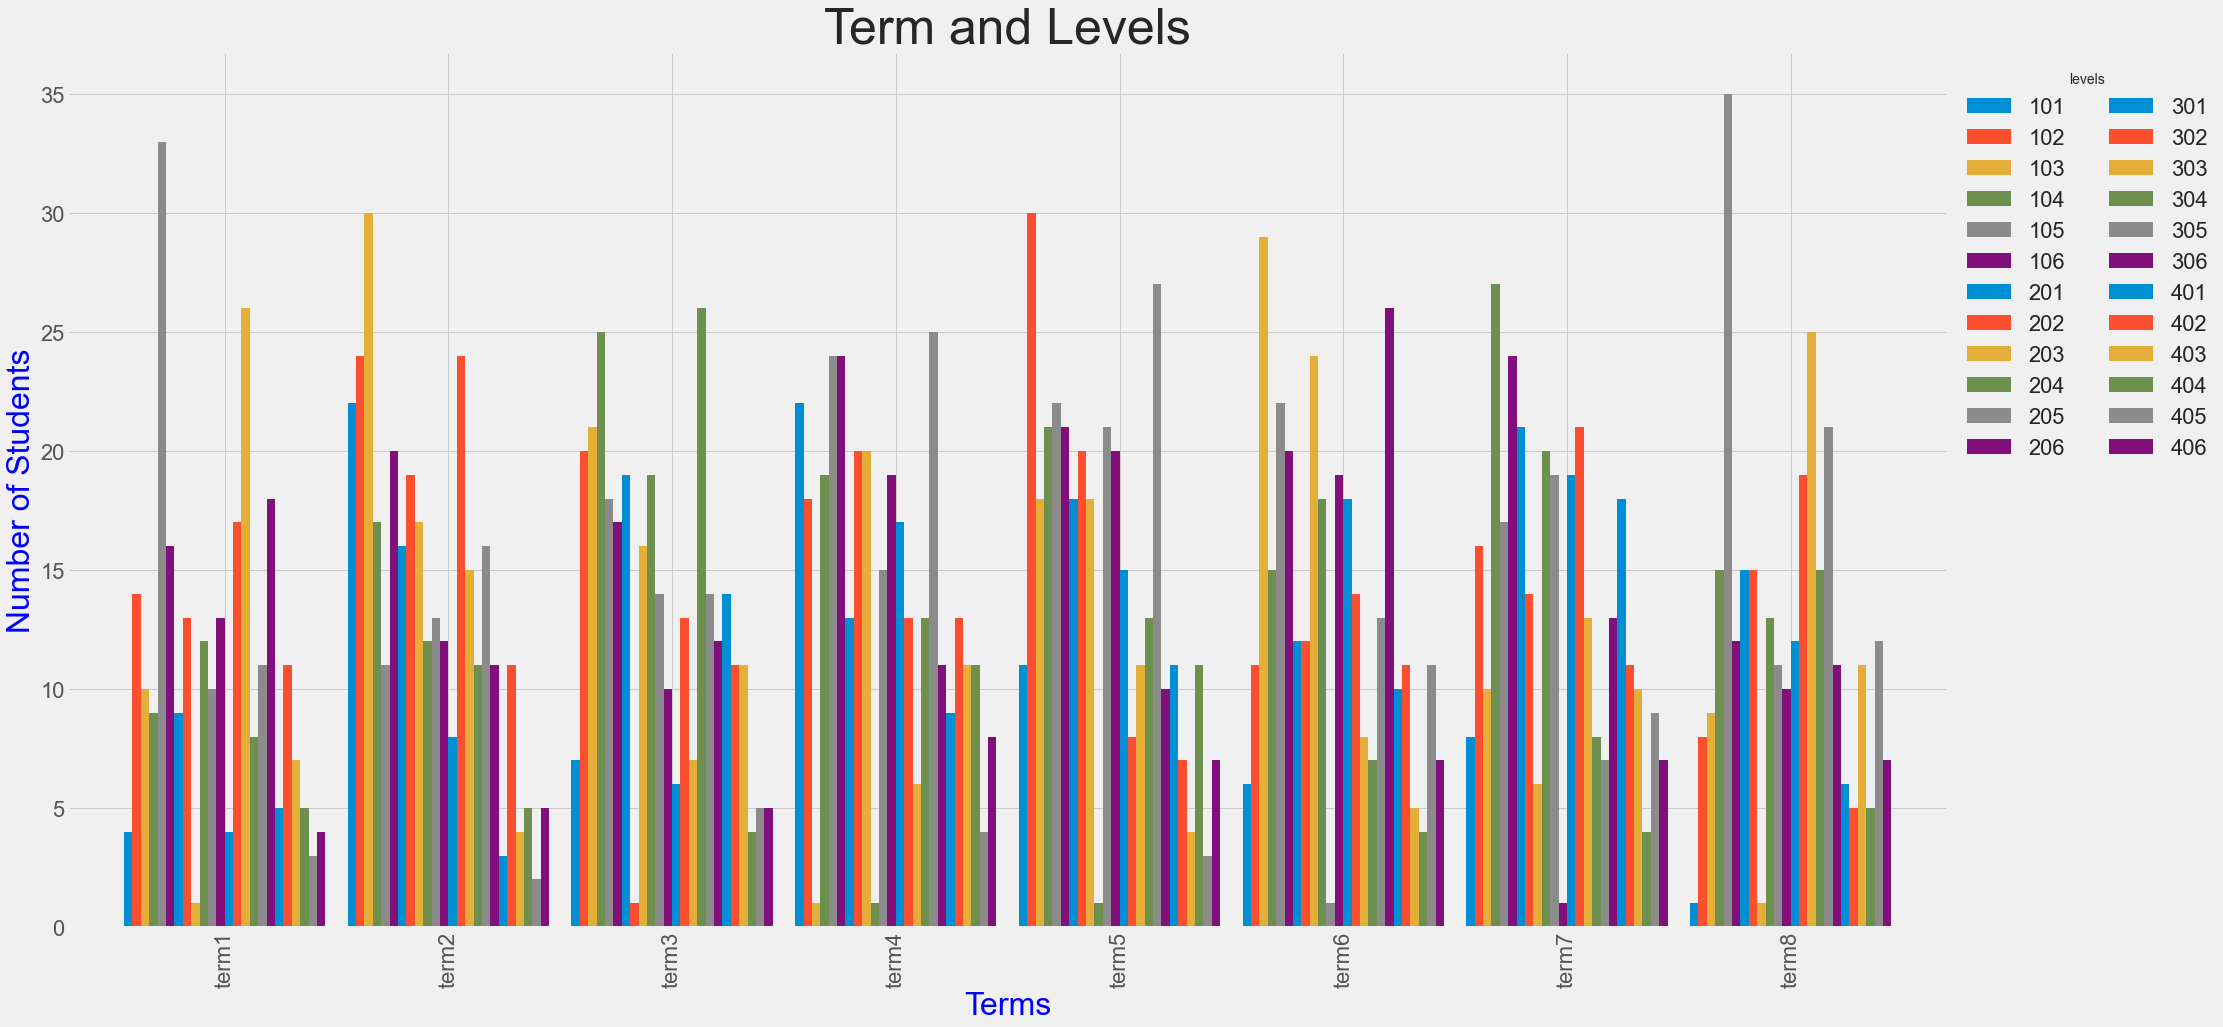

In [52]:
plt.style.use("fivethirtyeight")

TermsOnly.plot.bar(width=0.9)

plt.rcParams["figure.figsize"]=(30,15)

plt.legend(loc="upper left", bbox_to_anchor=(1,1), ncol=2, title="levels", prop={'size': 22} )

#setting up the plot
plt.title("Term and Levels", fontsize=50)
plt.xlabel("Terms", fontsize=32, c="blue")
plt.ylabel("Number of Students", fontsize=32, c="blue")
plt.xticks(fontsize=22)
plt.yticks(fontsize=22);


#Using this bar plot, we can easily see to what extent each level has contributed to the total number 
#of signed up students.

## This next data, is going to tell us how many students we had registered in each term(AKA active students)
## and how many students left us from the previous term(AKA lost students). 

In [13]:
os.chdir("/home/azadeh/dev-temp/data/amar")
ActiveLost = pd.read_csv("Lost_Active.csv")
ActiveLost.set_index('Unnamed: 0', inplace=True)

ActiveLost.head()

,LostStudents,ActiveStudents
Unnamed: 0,,
term1,72,452
term2,83,561
term3,90,545
term3,86,570
term4,66,585


## Note
It is important to know that for instance, ActiveLost.iloc[1]["LostStudents"] which is 83, is the 
number of students who did not come back from term 1 to term 2.
similarly, ActiveLost.iloc[0]["LostStudents"] which is 72, is the number of students that did not 
come back from the 8th term of the previous year to the first term of the target year.
Therefore, to know the percent of student loss we need to divide the number of lost students 
by the number of active students in the previous term. I was told that the 8th term of the year 1397, the
total number of students was 570.

In [15]:
i = 1
j = 0

FirstTerm = 72/570
PercentLost = [0.12]
while i < len(ActiveLost):
    while j < len(ActiveLost)-1:
        PercentLost.append(ActiveLost.iloc[i]["LostStudents"]/ActiveLost.iloc[j]["ActiveStudents"])
        j+=1
        
    i+=1


PercentLost = np.array(PercentLost)
PercentLost = np.round(PercentLost, 2)

print(PercentLost)

[0.12 0.18 0.15 0.15 0.15 0.14 0.15 0.15 0.15]


In [16]:
ActiveLost["PercentLost"] = PercentLost

In [17]:
ActiveLost

,LostStudents,ActiveStudents,PercentLost
Unnamed: 0,,,
term1,72,452,0.12
term2,83,561,0.18
term3,90,545,0.15
term3,86,570,0.15
term4,66,585,0.15
term5,56,567,0.14
term6,54,570,0.15
term7,97,566,0.15
tern8,90,486,0.15


## Note
It is believed that as long as the percent is below 0.15, the company is doing well.
Looking at the numbers we can see the company was doing well in most times.
The highest loss of students happened in the second term which is justifiable because it is the exact
time of final exams in schools and universities(around June) and since the terms in this institute are
relatively short, students usually choose to take a term off to study for their final axams.

The same story applies to the 7th term which is again the same time as the schools' and universities'
final exams. However, the institue had learned its lesson by then and provided students with great offers
such as discounts, more off days and... to retain the students which obviously worked well since 
the loss percent is no more different than the average.

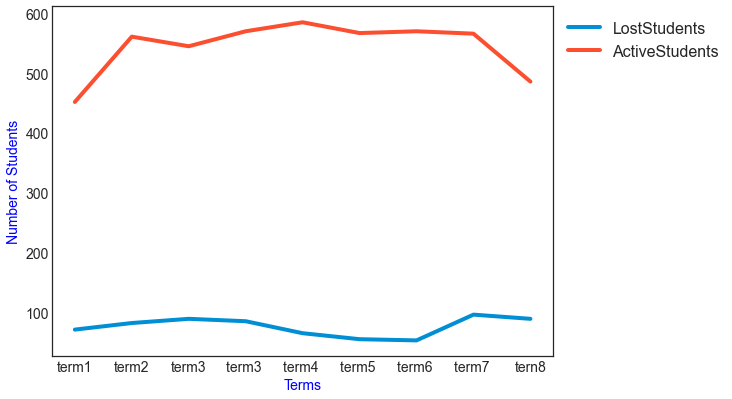

In [19]:
plt.rcParams["figure.figsize"] = (8,6)
plt.style.use("seaborn-white")

ActiveLost.drop("PercentLost", axis=1).plot()

#legend
plt.legend(loc="upper left", bbox_to_anchor=(1,1), fontsize=16)

#a and y labels:
plt.xlabel("Terms", fontsize = 14, c="blue")
plt.ylabel("Number of Students", fontsize = 14, c="blue");


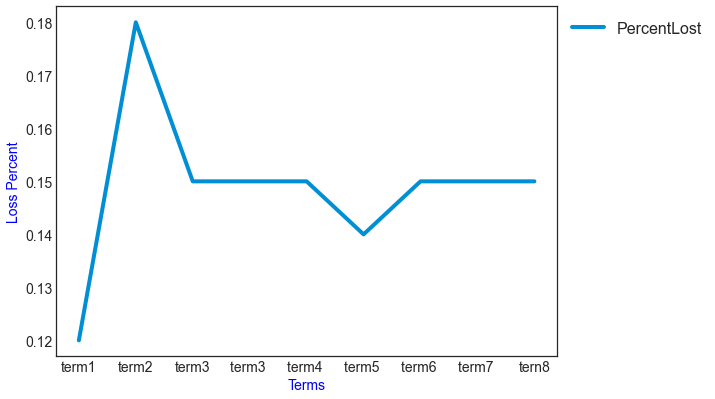

In [20]:
plt.rcParams["figure.figsize"] = (8,6)
plt.style.use("seaborn-white")

ActiveLost["PercentLost"].plot()

#legend
plt.legend(loc="upper left", bbox_to_anchor=(1,1), fontsize=16)

#a and y labels:
plt.xlabel("Terms", fontsize = 14, c="blue")
plt.ylabel("Loss Percent", fontsize = 14, c="blue");


## Analysis
That is why I thought we needed the percent column. As you can see in the first plot, in the 7th term
there seem to be a very high loss of students whereas while plotting the percentages (the second plot),
we can easily see that considering the number of active students, is was not as disasterous as it
seemed. However, the second term was in fact the worst term regarding students loss.
It is again visible in the next bar plot below:

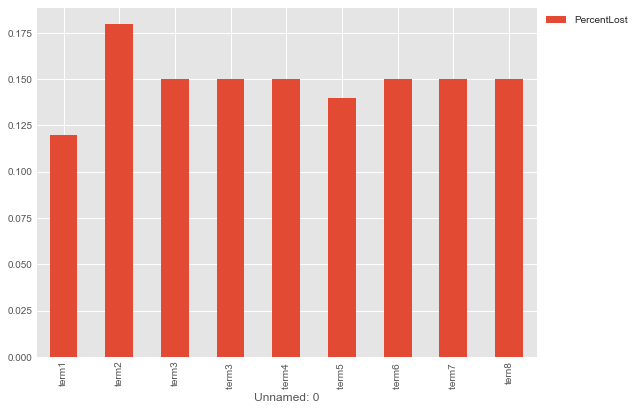

In [22]:
plt.style.use("ggplot")
ActiveLost["PercentLost"].plot(kind="bar")
plt.legend(loc="upper left", bbox_to_anchor=(1,1));